### **Computer Vision and Deep Learning for Medical Image Analysis Bootcamp**<br>Lecture 02 - Digital Image Enhancement<br>February 24, 2025

##**Some Theory**

###**What is image enhancement?**
Image enhancement is among the simplest and most appealing areas of digital image processing. Basically, the idea behind enhancement techniques is to bring out detail that is obscured, or simply to highlight certain features of interest in an image. A familiar example of enhancement is when we increase the contrast of an image because “it looks better.” It is important to keep in mind that enhancement is a very subjective area of image processing.

###**What enhancement technique?**
Image enhancement methods are crucial in image processing because they play a vital role in improving the visual quality and interpretability of images. However, there are several reasons of employing image enhancement techniques. For example:
* Improved Visual Quality
* Feature Enhancement
* Noise Reduction
* Contrast Enhancement
* Detail Preservation
* Diagnostic Accuracy


###**How image enhancement works?**
Image enhancement techniques modify pixel values to improve image quality. By applying mathematical operations like filtering, contrast adjustment, or color manipulation, these techniques enhance visual features such as edges, details, and overall clarity. This process can be as simple as increasing brightness or as complex as using advanced algorithms to remove noise or restore lost information.


###**Classification of image enhancement methods**
**Color Enhancement:** These methods focus on enhancing the color information in images:
* Color Balance: Adjusts the balance of colors to correct color casts.
* Saturation Adjustment: Controls the intensity of colors.
* Color Transfer: Transfers color characteristics from one image to another.

**Histogram-Based Methods:** These methods work on modifying the histogram of an image to enhance its contrast or emphasize certain features:

* Adaptive Histogram Equalization: Applies histogram equalization to localized regions.
* CLAHE (Contrast Limited Adaptive Histogram Equalization): Limits the extent of histogram equalization to avoid over-amplification of noise.

**Spatial Filtering:** Spatial filtering techniques involve convolution of the image with a filter kernel. Depending on the kernel used, different features can be emphasized or suppressed. Common filters include,
* Smoothing Filters: Blur the image to reduce noise and small details.
* Sharpening Filters: Enhance edges and fine details

**Frequency Domain Methods:** These methods involve transforming the image into the frequency domain. Enhancements are made in the frequency domain, and the image is transformed back to the spatial domain:
* Low-Pass Filtering: Removes high-frequency noise while preserving low-frequency details.
* High-Pass Filtering: Enhances high-frequency details, often revealing edges and fine structures.








##**Color Enhancement**

###Gamma Correction
Gamma correction is a technique used to adjust the brightness and contrast of an image by changing the gamma value. The gamma value controls the relationship between pixel values in the input and output images. It is often used to compensate for the non-linear behavior of displays and improve the perceived quality of images.


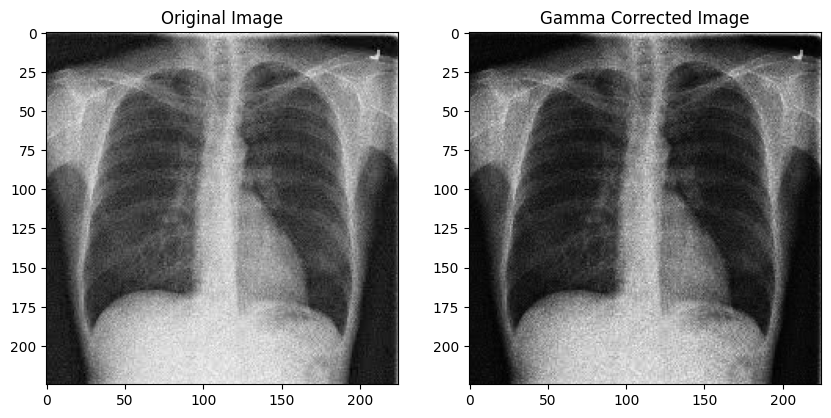

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Load image
image = cv2.imread('/content/x-ray-image.jpeg')

# Check if image loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    gamma_corrected = gamma_correction(image, gamma=0.7)

    # Display the result
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.title('Gamma Corrected Image')
    plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
    plt.show()

**Original Image:** The original chest X-ray appears relatively dark, especially in the soft tissue regions. While the bones and high-density areas are distinguishable, the overall contrast limits visibility in the lung structures and finer details.

**Gamma Corrected Image:**
After applying gamma correction (𝛾 = 0.7), the image has been brightened, enhancing visibility in the lower-intensity regions. The key improvements include:

* Increased Detail in Soft Tissues: Lung structures are now more distinguishable.
* Balanced Contrast: The enhancement ensures better differentiation between various anatomical features without overexposing brighter areas.


###Pseudo Color
Artificially coloring an image can reveal textures and qualities within the image that may not have been apparent in the original coloring. You can use the pseudo coloring module to reveal an image's hidden texture.
The Pseudo Color module colonizes the image based on its grayscale value which maps to a full RGB color range. Pseudo Color images can help to reveal image qualities that would not be readily visible within the image's true color. Pseudo-coloring assigns different colors to different intensity levels in the grayscale image. This helps in highlighting subtle variations in tissue density and making patterns more visible.

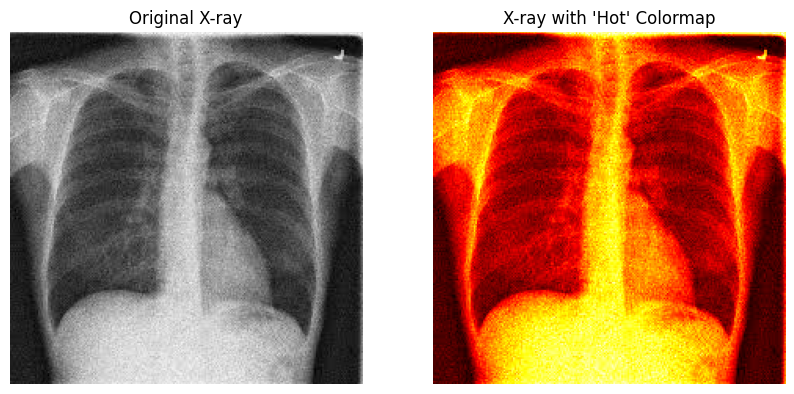

In [27]:
import cv2
import matplotlib.pyplot as plt

# Load the grayscale X-ray image
image = cv2.imread("/content/x-ray-image.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply the 'Hot' colormap
color_mapped_image = cv2.applyColorMap(image, cv2.COLORMAP_HOT)

# Display the original and enhanced images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap="gray")
plt.title("Original X-ray")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(color_mapped_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title("X-ray with 'Hot' Colormap")
plt.axis("off")

plt.show()


**X-ray with 'Hot' Colormap**

* The 'Hot' colormap has been applied to the original X-ray to enhance visual contrast.
* This colormap uses a gradient of colors from black to red to yellow to white.
* Black areas represent the least intense (most transparent) parts of the X-ray, likely indicating air spaces.
* Red and yellow areas represent intermediate intensities, which could correspond to soft tissues.
* White areas represent the highest intensities (most opaque), typically indicating bones or very dense structures.

##**Histogram-Based Methods**

###Contrast-limited adaptive histogram equalization (CLAHE)
Contrast-Limited Adaptive Histogram Equalization (CLAHE) is an enhanced version of histogram equalization that aims to avoid over-amplification of noise by limiting the contrast enhancement locally within small regions of the image. This is achieved by dividing the image into overlapping tiles and then applying histogram equalization separately to each tile while limiting the contrast enhancement.


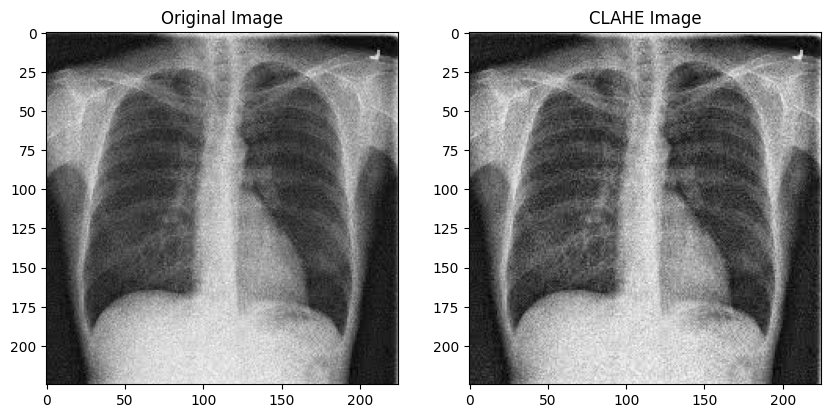

In [58]:
def clahe(image):
    clahe = cv2.createCLAHE(clipLimit=0.9, tileGridSize=(8, 8))
    if image is not None: # Check if image was loaded successfully
        if len(image.shape) == 2:
            return clahe.apply(image)
        elif len(image.shape) == 3:
            channels = cv2.split(image)
            clahe_channels = [clahe.apply(ch) for ch in channels]
            return cv2.merge(clahe_channels)
    else:
        return None # Handle the case where image is None

# Load image. Make sure 'image_path' is correct.
image_path = '/content/x-ray-image.jpeg' # Replace with your actual image path
image = cv2.imread(image_path, 0)
clahe_image = clahe(image)

# Display the result
if clahe_image is not None: # Check if CLAHE was applied successfully
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('CLAHE Image')
    plt.imshow(clahe_image, cmap='gray')
    plt.show()
else:
    print("Failed to load or apply CLAHE to the image. Check the file path.")


**CLAHE Image**

* Higher contrast, enhancing visibility of the lung fields, ribs, and other anatomical structures.
* Structures like bones (ribs, spine), heart, and soft tissues are more clearly visible and better defined.
* More effective for identifying abnormalities or areas of interest due to enhanced contrast and clearer differentiation of anatomical features.

###Histogram Thresholding
Histogram thresholding is a technique for separating image pixels into two distinct categories based on their intensity values. It involves analyzing the histogram, representing the frequency distribution of pixel intensities, and selecting a threshold value to partition the image into foreground and background.

Pixels with intensity values above the threshold are classified as foreground, while those below it are considered background. This process is known as binarization, and it results in a binary image representing each pixel in either black or white.

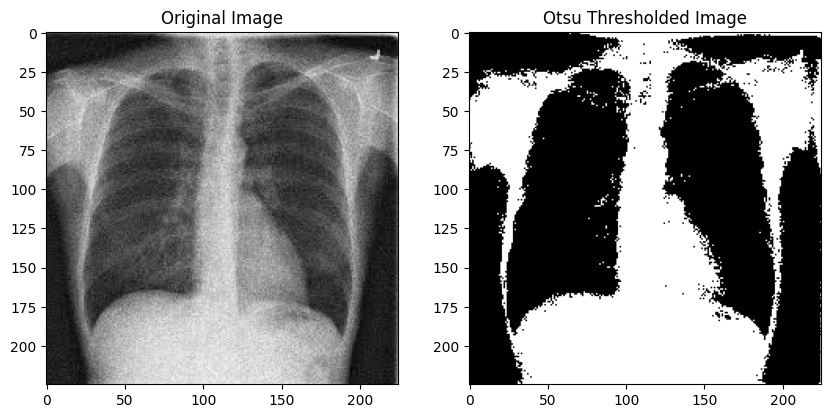

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale X-ray image
image = cv2.imread('/content/x-ray-image.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's Thresholding
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(binary_image, cmap='gray'), plt.title('Otsu Thresholded Image')
plt.show()

**Otsu Threshold Image**

* Reduces the image to two colors, highlighting areas of interest with enhanced contrast.
* Emphasizes the separation between high and low-density areas, making certain features stand out more clearly.

##**Special Filtering**

###Averaging Filter
The Averaging Filter is a widely used filter that smooths an image by replacing each pixel's value with the average of its neighboring pixels. This filter is commonly applied to reduce noise and remove small variations in an image, helping to enhance the overall quality. Typically, an averaging filter uses a square kernel (e.g., 3x3 or 5x5), where each element of the kernel has equal weight, resulting in a blurring effect that can be useful for preprocessing steps in image analysis.

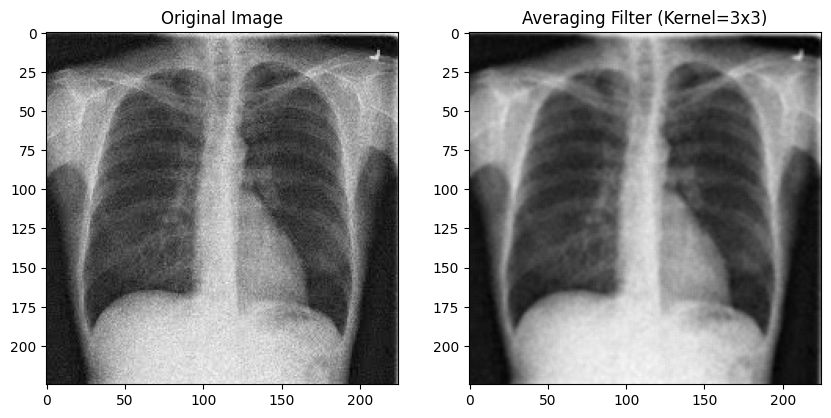

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale X-ray image
image = cv2.imread('/content/x-ray-image.jpeg', cv2.IMREAD_GRAYSCALE)

# Define the kernel size for averaging filter
kernel_size = 3  # You can adjust this value (e.g., 3, 5, 7, etc.)

# Apply averaging filter using OpenCV's blur function
smoothed_image = cv2.blur(image, (kernel_size, kernel_size))

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(smoothed_image, cmap='gray'), plt.title(f'Averaging Filter (Kernel={kernel_size}x{kernel_size})')
plt.show()

**Averaging Filter**
* Noise is reduced, resulting in a cleaner image.
* Slightly lower contrast, leading to smoother transitions but potentially obscuring finer details.
* Edges and fine details are slightly blurred due to the averaging effect.

###Unsharp Masking
Unsharp masking is a common technique used in image processing to enhance the sharpness of an image. It works by subtracting a blurred version of the image from the original, thereby emphasizing high-frequency components (edges) while preserving the overall structure.

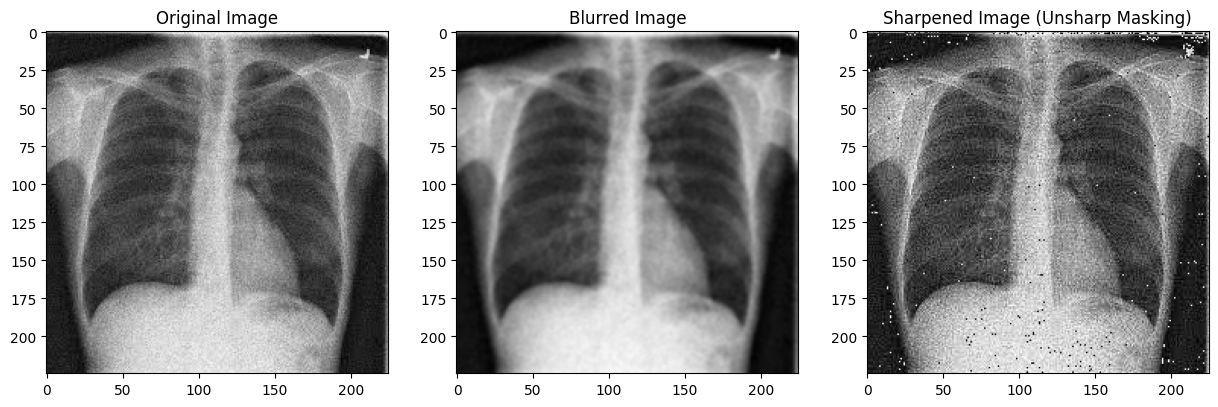

In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale X-ray image
image = cv2.imread('/content/x-ray-image.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Gaussian blur to create the blurred version
blur_radius = 5  # Adjust this value to control the blur intensity
blurred_image = cv2.GaussianBlur(image, (blur_radius, blur_radius), 0)

# Step 2: Compute the mask (difference between original and blurred)
mask = image - blurred_image

# Step 3: Add the mask to the original image with a scaling factor
scaling_factor = 1  # Adjust this value to control the sharpening strength
sharpened_image = image + scaling_factor * mask

# Ensure pixel values are within [0, 255]
sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(blurred_image, cmap='gray'), plt.title('Blurred Image')
plt.subplot(1, 3, 3), plt.imshow(sharpened_image, cmap='gray'), plt.title('Sharpened Image (Unsharp Masking)')
plt.show()

**Sharpened Image**
* Increases clarity, making structures more defined and easier to distinguish.
* Enhances details, making it easier to see fine structures and differences in density.